In [7]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder() #df.str1)


pr = cProfile.Profile()
pr.enable()
  
enc.fit(tmp[['str0','str1','str2']])
enc.transform(tmp[['str0','str1','str2']])#.toarray()

pr.disable()
stats = Stats(pr)
stats.sort_stats('tottime').print_stats(10)

         7942 function calls (7898 primitive calls) in 0.006 seconds

   Ordered by: internal time
   List reduced from 331 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1654    0.000    0.000    0.001    0.000 {built-in method builtins.isinstance}
     1200    0.000    0.000    0.001    0.000 /opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/utils/__init__.py:956(is_scalar_nan)
        2    0.000    0.000    0.000    0.000 /opt/conda/envs/rapids/lib/python3.8/site-packages/pandas/core/internals/managers.py:224(_rebuild_blknos_and_blklocs)
     1210    0.000    0.000    0.000    0.000 /opt/conda/envs/rapids/lib/python3.8/abc.py:96(__instancecheck__)
        9    0.000    0.000    0.001    0.000 /opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/utils/_encode.py:84(<setcomp>)
     1210    0.000    0.000    0.000    0.000 {built-in method _abc._abc_instancecheck}
       18    0.000    0.000    0.000    0.000 {

##### indv cuCat function bench

In [87]:
os.getcwd()
# os.chdir('../..')
# os.getcwd()

'/Users/danielmorgan/Documents/cuCat'

In [88]:
import cProfile, os
import pandas, numpy,cudf
from pstats import Stats
from sklearn.utils import parse_version

from vectorizers import HashingVectorizer

ModuleNotFoundError: No module named 'cudf'

In [ ]:
# !pip install --user pygraphistry/ --quiet

import graphistry

graphistry.register(api=3,protocol="https", server="hub.graphistry.com", username='dcolinmorgan', password='f5UwthGEF@F@xnP')
graphistry.__version__

# os.chdir('pygraphistry')
# !git checkout cuCat
# os.chdir('..')

In [ ]:
dd=pandas.read_parquet('part.88.parquet',columns=['UserName','EventID','LogHost','LogonID','DomainName'])

# data['DomainName'].str.split(r'\s*,\s*(?=[A-Z]')
# data[['DomainName']] = data[['DomainName']].apply(pandas.to_numeric, errors='coerce')
dd['DomainName']=dd['DomainName'].str.extract('(\d+)', expand=False)
dd['UserName']=dd['UserName'].str.extract('(\d+)', expand=False)
dd['LogonID']=dd['LogonID'].str.extract('(\d+)', expand=False)
dd['LogHost']=dd['LogHost'].str.extract('(\d+)', expand=False)

# dd['EventID']=dd['EventID'].str.extract('(\d+)', expand=False)

dd=dd.dropna().astype(int)

In [ ]:
g=graphistry\
    .edges(dd[:10000000].astype(int),source='UserName', destination='DomainName')\
    .bind(edge_weight='EventID')

g2 = (
    g.nodes(dd[:10000000].astype(int), 'LogHost')
    .bind(point_title='EventID')
    # .bind(edge_title='score')
)
# g=graphistry.nodes(df.iloc[:,:4])

# ,source='str0',destination='str1')
pr = cProfile.Profile()
pr.enable()

g2=g2.featurize(memoize=False,feature_engine='dirty_cat')
# g2 = g2.umap(engine='cuml',memoize=False,feature_engine='cuCat')

pr.disable()
stats = Stats(pr)
stats.sort_stats('tottime').print_stats(20)


In [ ]:
from importlib import reload

import cuCat
os.chdir('cuCat')
import cuCat
reload(cuCat)
from cuCat import GapEncoder

os.chdir('..')

print(cuCat.__version__)

g=graphistry\
    .edges(dd[:10000000],source='UserName', destination='DomainName')\
    .bind(edge_weight='EventID')

g2 = (
    g.nodes(dd[:10000000], 'LogHost')
    .bind(point_title='EventID')
    # .bind(edge_title='score')
)
# g=graphistry.nodes(df)

# ,source='str0',destination='str1')
pr = cProfile.Profile()
pr.enable()

g2=g2.featurize(memoize=False,feature_engine='cuCat')
# g2 = g2.umap(engine='cuml',memoize=False,feature_engine='cuCat')

pr.disable()
stats = Stats(pr)
stats.sort_stats('tottime').print_stats(20)


In [ ]:
string1=df.str3
string1 = string1.replace(' ', '  ')
string1 = string1.replace(r'([^\s])', r'\1 ',regex=True)
string1 = cudf.Series(string1).str.normalize_characters()

ngrams1 = string1.str.ngrams_tokenize(n=4,separator=',',delimiter=' ')
count1 = ngrams1.value_counts()

### assemble NMF encoder

In [1]:
import cProfile, os
import pandas, numpy #,cudf
from pstats import Stats
from sklearn.utils import parse_version
import matplotlib.pyplot as plt
# from vectorizers import HashingVectorizer

In [2]:
# import cupy as cp
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

twenty_train = fetch_20newsgroups(subset='train',shuffle=True, random_state=42)

cv = CountVectorizer()
transformer = TfidfTransformer()

data=twenty_train.data#.astype(cp.float32)
X = cv.fit_transform(data)[:100]


In [3]:
pr = cProfile.Profile()
pr.enable()
X_transformed = transformer.fit_transform(X)

pr.disable()
stats = Stats(pr)
stats.sort_stats('tottime').print_stats(20)

y = twenty_train.target.astype(numpy.int32)[:100]
model = MultinomialNB()
model.fit(X_transformed, y)
result = model.score(X_transformed, y)
print(result) 

         1350 function calls (1328 primitive calls) in 0.004 seconds

   Ordered by: internal time
   List reduced from 209 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 /opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/scipy/sparse/_dia.py:392(tocoo)
        1    0.001    0.001    0.003    0.003 /opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:1604(fit)
        1    0.000    0.000    0.000    0.000 {built-in method scipy.sparse._sparsetools.csr_sort_indices}
       72    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 {built-in method scipy.sparse._sparsetools.coo_tocsr}
        6    0.000    0.000    0.000    0.000 {method 'astype' of 'numpy.ndarray' objects}
        1    0.000    0.000    0

#### Tfidf transformed + UMAP

In [4]:
# !pip install umap-learn
from umap import UMAP

g=UMAP()
# tmp=g.fit(X.toarray())

In [5]:
# gg=g.transform(X_transformed[:100].toarray())
gg=g.fit_transform(X_transformed[:1000].toarray())
# plt.plot(gg)

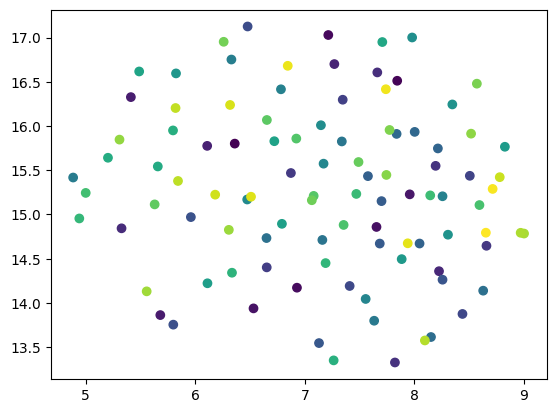

In [6]:
gg=pandas.DataFrame(gg)
plt.scatter(gg[0],gg[1],c=gg.index)

#### sklearn NMF + UMAP

In [32]:
from sklearn.decomposition import NMF

g = NMF(n_components=10, init='random', random_state=0)

pr = cProfile.Profile()
pr.enable()

W = g.fit_transform(X)#.get().toarray())

pr.disable()
H = g.components_
stats = Stats(pr)
stats.sort_stats('tottime').print_stats(20)


         31363 function calls (31360 primitive calls) in 1.642 seconds

   Ordered by: internal time
   List reduced from 221 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      400    1.167    0.003    1.535    0.004 /opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:390(_update_coordinate_descent)
1232/1230    0.221    0.000    0.222    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
      402    0.111    0.000    0.111    0.000 {built-in method numpy.zeros}
        1    0.049    0.049    1.596    1.596 /opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:420(_fit_coordinate_descent)
      200    0.024    0.000    0.024    0.000 {built-in method scipy.sparse._sparsetools.csc_matvecs}
        2    0.021    0.010    0.021    0.010 {method 'standard_normal' of 'numpy.random.mtrand.RandomStat

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [33]:
# from umap import UMAP
modd=UMAP(n_neighbors = 10).fit(W)
WW=modd.transform(W)
# plt.plot(WW)

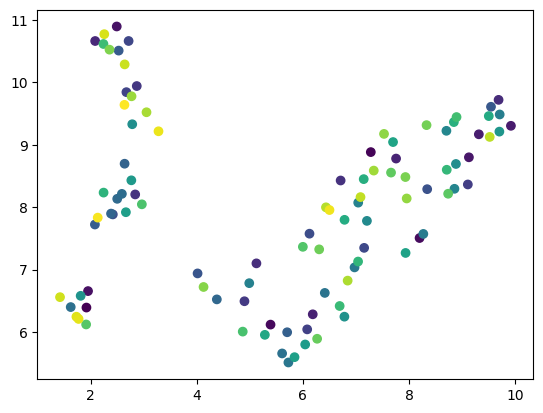

In [34]:
WW=pandas.DataFrame(WW)

plt.scatter(WW[0],WW[1],c=WW.index)

#### torch NMF + UMAP

In [35]:
# !pip install --user torchnmf
import torch
from torchnmf.nmf import NMF

In [36]:
AA=torch.Tensor(X.toarray())
AA.t().size()

torch.Size([130107, 100])

In [37]:
model = NMF(AA.t().shape, rank=R)  ## AA.cuda.t().shape

pr = cProfile.Profile()
pr.enable()
R=10

model.fit(AA.t()) # m.cuda()

pr.disable()
stats = Stats(pr)
stats.sort_stats('tottime').print_stats(20)

         2004 function calls in 2.215 seconds

   Ordered by: internal time
   List reduced from 119 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       60    1.086    0.018    1.540    0.026 /opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/torchnmf/nmf.py:52(_double_backward_update)
       60    0.312    0.005    0.312    0.005 {method 'run_backward' of 'torch._C._EngineBase' objects}
       64    0.259    0.004    0.259    0.004 {built-in method torch._C._nn.linear}
       68    0.122    0.002    0.122    0.002 {method 'add' of 'torch._C._TensorBase' objects}
        1    0.113    0.113    2.214    2.214 /opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/torchnmf/nmf.py:294(fit)
        4    0.096    0.024    0.269    0.067 /opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.10/site-packages/torchnmf/metrics.py:6(kl_div)
        8    0.095    0.012    0.095    0.

In [38]:
# HWt=HWt.detach().numpy()

# from umap import UMAP
modd=UMAP(n_neighbors = 10).fit(model.W.detach().numpy())
# modd.transform(HWt)

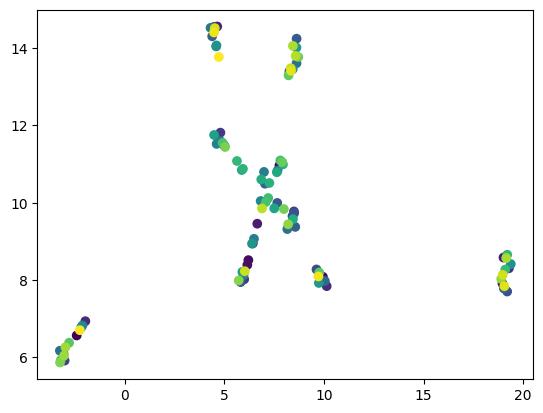

In [39]:
ZZ=modd.transform(model.W.detach().numpy())
ZZ=pandas.DataFrame(ZZ)

plt.scatter(ZZ[0],ZZ[1],c=ZZ.index)

#### dirty_cat super encoder + UMAP

In [78]:
from dirty_cat import SuperVectorizer
sup_vec = SuperVectorizer(auto_cast=True)

In [80]:
X_train_enc = sup_vec.fit_transform(data[:100])

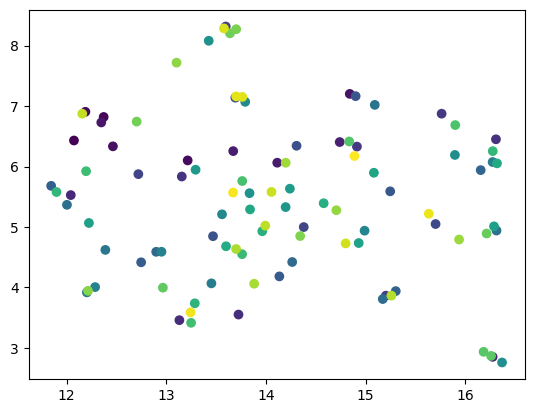

In [86]:
XX=UMAP(n_neighbors = 10).fit_transform(X_train_enc)

XX=pandas.DataFrame(XX)

plt.scatter(XX[0],XX[1],c=XX.index)

#### graphistry encode + UMAP

In [47]:
!pip install --user graphistry --quiet

import graphistry

graphistry.register(api=3,protocol="https", server="hub.graphistry.com", username='dcolinmorgan', password='f5UwthGEF@F@xnP')
graphistry.__version__

# os.chdir('pygraphistry')
# !git checkout cuCat
# os.chdir('..')

'0.28.7'

In [72]:
jj=pandas.DataFrame(pandas.DataFrame(data[:100])[0].str.split('\n',expand=True))


In [73]:
g=graphistry.nodes(jj.iloc[:,:10])

In [74]:
g2 = g.umap()
g2.plot()

* Ignoring target column of shape (100, 0) in UMAP fit, as it is not one dimensional